In [1]:
# Constants
DATA_PATH = '../Data/Processed/0_DataCleaned_df.csv'
PKL_EXPORT_PATH = "../data/processed/1_EDA_df.pkl"
CSV_EXPORT_PATH = "../data/processed/0_EDA_df.csv"

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv(DATA_PATH)

In [4]:
df.sample(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Revenue,job_title,seniority,min_salary,max_salary,avg_salary,desc_len,company_name,job_state,age
726,Decision Scientist,Employer Provided Salary:$133K - $185K,Instagram’s vision is “to be a place where peo...,3.9,Meta\r\n3.9,Remote,10000+ Employees,2004,Company - Public,Internet & Web Services,...,$10+ billion (USD),data scientist,na,133,185,159.0,1540,Meta,Remote,19


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'job_title', 'seniority', 'min_salary',
       'max_salary', 'avg_salary', 'desc_len', 'company_name', 'job_state',
       'age'],
      dtype='object')

In [6]:
eda_df= df[['job_title','seniority','company_name','job_state','age','Rating','Job Description','desc_len', 'Size', 'Type of ownership', 'Industry' 
            ,'Sector', 'Revenue','min_salary','max_salary','avg_salary']].copy()

In [7]:
eda_df.sample()

,job_title,seniority,company_name,job_state,age,Rating,Job Description,desc_len,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary
227,data analyst,na,Realtor.com Careers,TX,30,3.7,"At Realtor.com®, we have among the most compre...",1206,1001 to 5000 Employees,Company - Private,Computer Hardware Development,Information Technology,Unknown / Non-Applicable,102,148,125.0


## Exploratory Data Analysis

### Numerical Columns

In [8]:
eda_df.describe()

,age,Rating,desc_len,min_salary,max_salary,avg_salary
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,42.127249,3.715424,1461.196658,114.588689,155.302057,134.945373
std,42.684838,1.146151,1075.739117,35.297310,40.435659,35.524701
min,-1.000000,-1.000000,75.000000,62.000000,81.000000,76.000000
25%,9.000000,3.700000,819.000000,83.000000,124.000000,105.000000
50%,25.000000,3.900000,1110.000000,102.000000,153.500000,131.000000
75%,61.000000,4.200000,1842.000000,149.000000,184.000000,162.500000
max,322.000000,5.000000,5530.000000,183.000000,255.000000,217.000000


<Axes: >

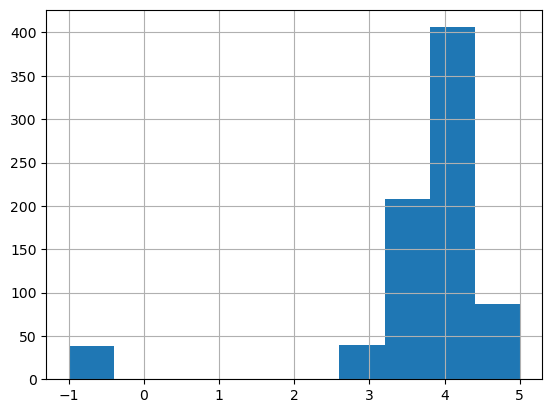

In [9]:
eda_df.Rating.hist()

#### * Seems like the Ratings exists between 2.7 to 5.0 except the few missing values

<Axes: >

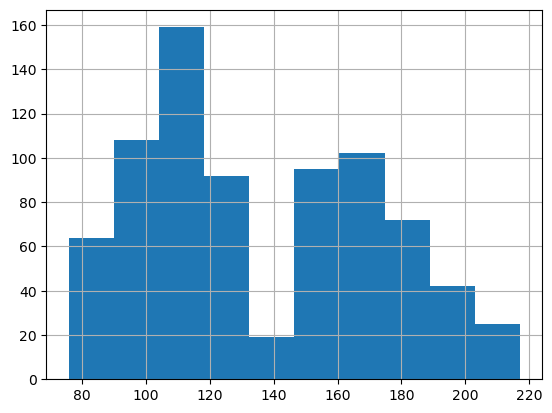

In [10]:
eda_df.avg_salary.hist()

#### * avg salary looks good except the column of 140k, maybe do some more visualization to figure where the differences are coming from

<Axes: >

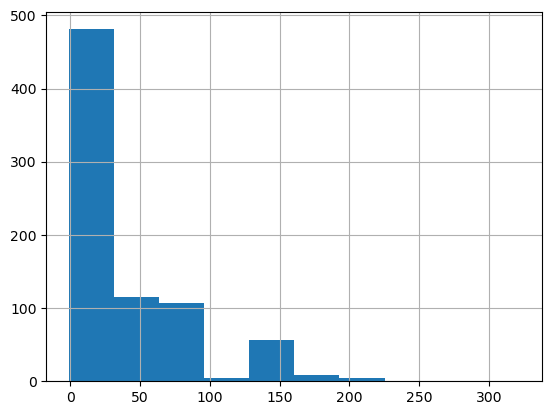

In [11]:
df.age.hist()

#### most companies are under the age of 30, maybe we need to normalize this column

<Axes: >

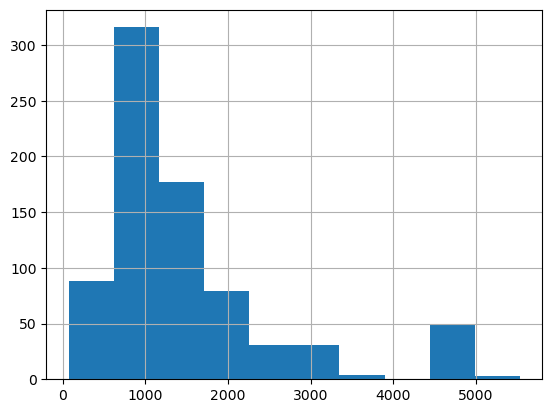

In [12]:
eda_df.desc_len.hist()

#### * the description length is centered around the 1000 characters, except some few job on the right side

<Axes: >

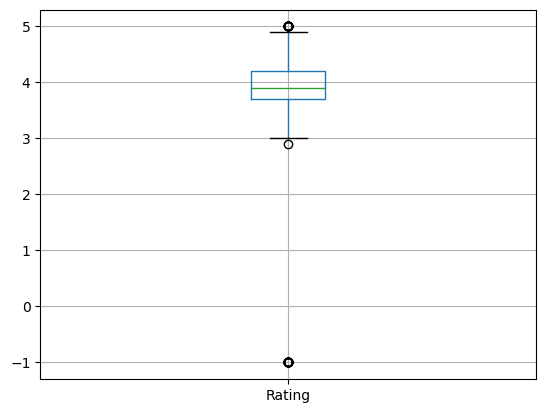

In [13]:
df.boxplot(column=['Rating'])

<Axes: >

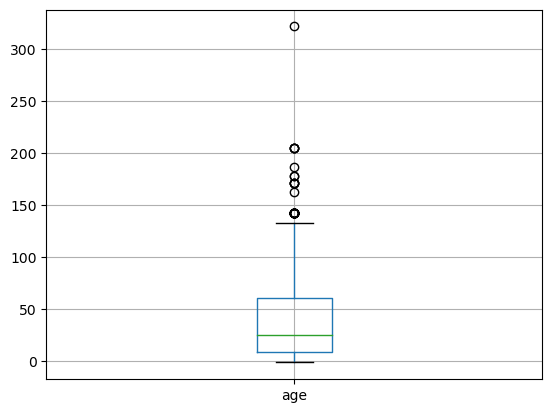

In [14]:
df.boxplot(column=['age']) 

<Axes: >

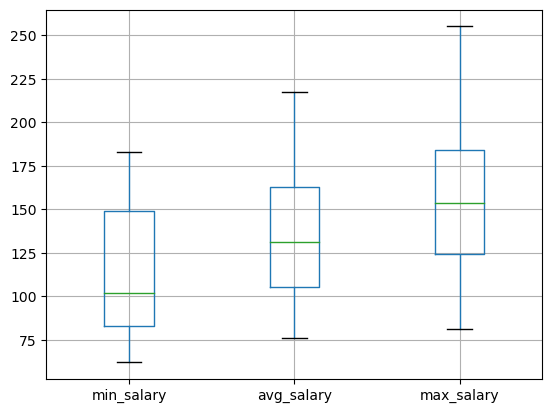

In [15]:
df.boxplot(column=['min_salary','avg_salary','max_salary'])

<Axes: >

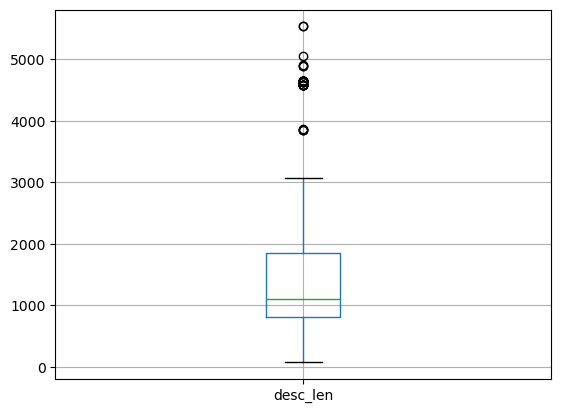

In [16]:
df.boxplot(column=['desc_len'])

In [17]:
eda_df[['age','Rating','desc_len','min_salary','max_salary','avg_salary']].corr()

,age,Rating,desc_len,min_salary,max_salary,avg_salary
age,1.000000,0.100859,0.105697,-0.412070,-0.446781,-0.458988
Rating,0.100859,1.000000,0.002187,0.215135,0.198501,0.219850
desc_len,0.105697,0.002187,1.000000,-0.268401,0.002763,-0.131769
min_salary,-0.412070,0.215135,-0.268401,1.000000,0.759168,0.928857
max_salary,-0.446781,0.198501,0.002763,0.759168,1.000000,0.946275
avg_salary,-0.458988,0.219850,-0.131769,0.928857,0.946275,1.000000


<Axes: >

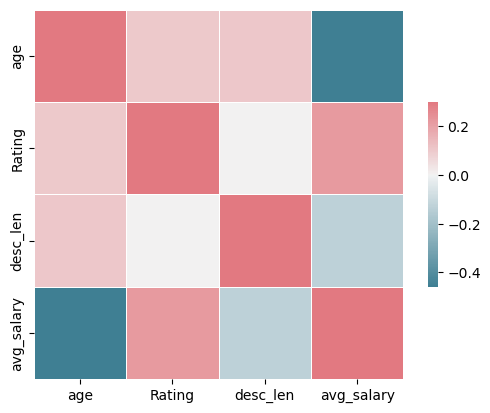

In [18]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(eda_df[['age','Rating','desc_len','avg_salary']].corr(), vmax =.3, center = 0, cmap=cmap,
            square = True , linewidths=0.5, cbar_kws={"shrink":0.5})

#### * seems like age has a negative correlation with salary
#### * also age have a slightly negative correlation with desc_len

### Categorical Columns

In [19]:
eda_df.columns

Index(['job_title', 'seniority', 'company_name', 'job_state', 'age', 'Rating',
       'Job Description', 'desc_len', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'min_salary', 'max_salary', 'avg_salary'],
      dtype='object')

In [27]:
cat_eda_df = eda_df[['job_title', 'seniority', 'company_name', 'job_state' ,'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue']]

graph for job_title: total = 778


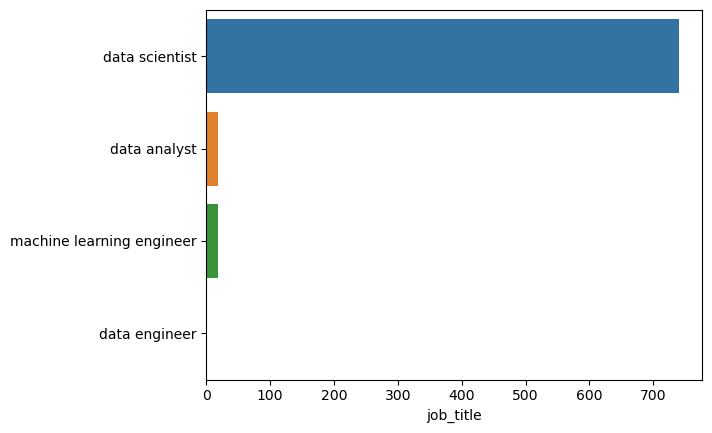

graph for seniority: total = 778


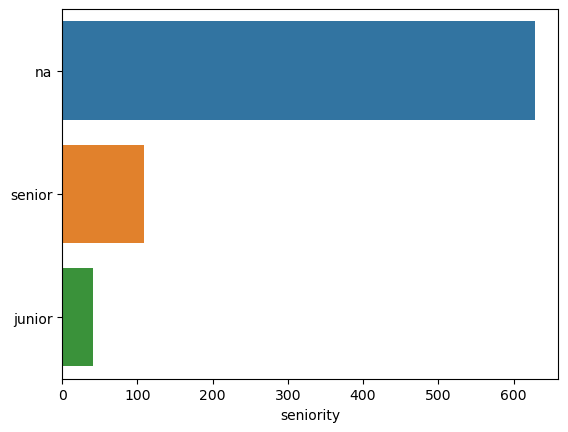

graph for company_name: total = 778


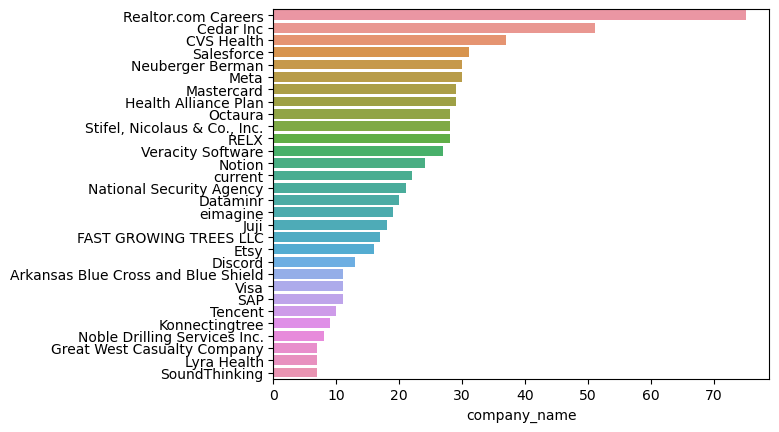

graph for job_state: total = 778


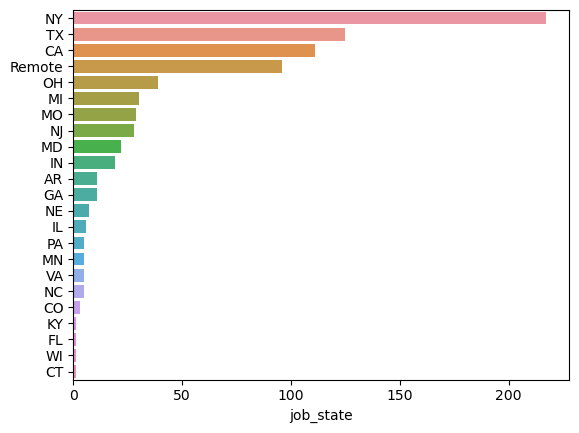

graph for Size: total = 778


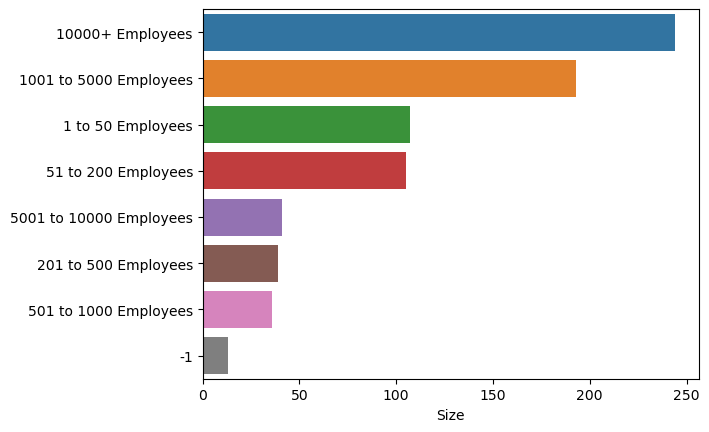

graph for Type of ownership: total = 778


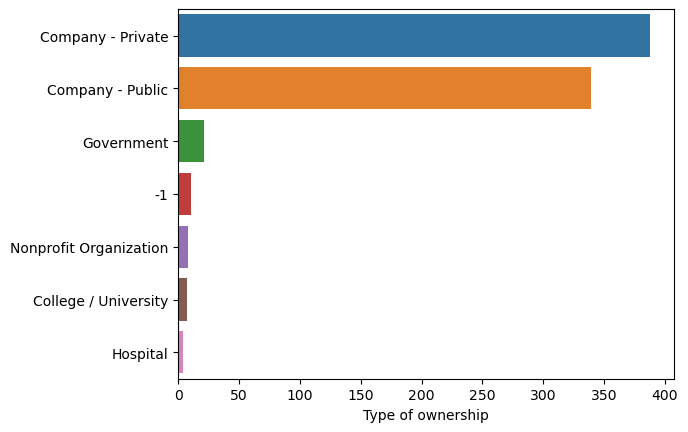

graph for Industry: total = 778


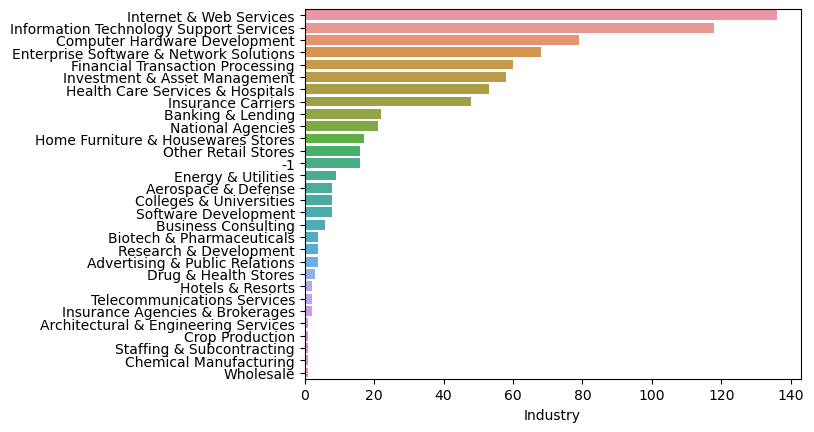

graph for Sector: total = 778


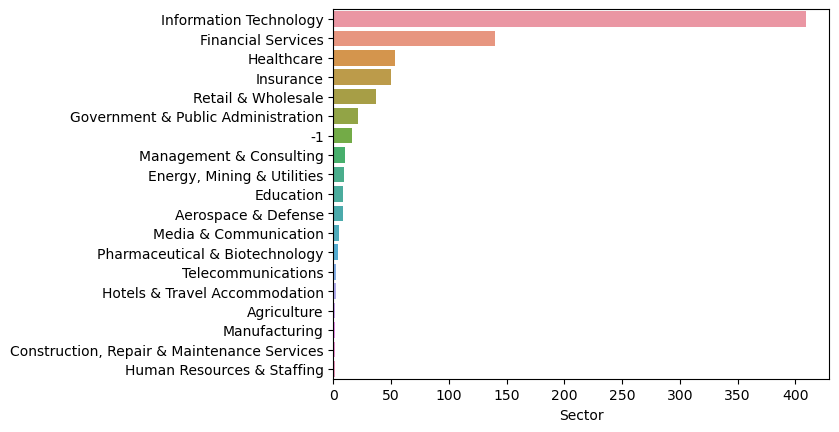

graph for Revenue: total = 778


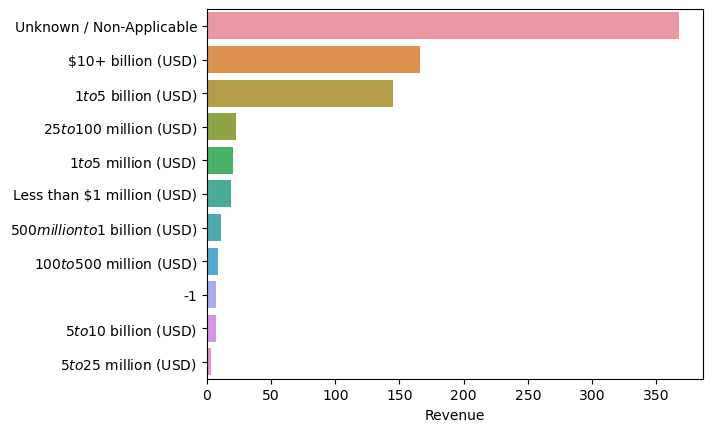

In [31]:
for i in cat_eda_df.columns:
    val_counts = cat_eda_df[i].value_counts()[:30]
    print("graph for %s: total = %d" % (i, len(cat_eda_df)))
    chart = sns.barplot(x=val_counts, y=val_counts.index)
    # chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [35]:
pd.pivot_table(eda_df, index = 'job_title', values ='avg_salary')

,avg_salary
job_title,
data analyst,120.210526
data engineer,98.000000
data scientist,135.457432
machine learning engineer,131.500000


In [37]:
pd.pivot_table(eda_df, index =['job_title','seniority'], values='avg_salary')

avg_salary
job_title                 seniority            
data analyst              junior      82.000000
                          na         122.333333
data engineer             na          98.000000
data scientist            junior      92.137500
                          na         131.508460
                          senior     172.766055
machine learning engineer na         131.500000

In [40]:
pd.pivot_table(eda_df, index = ['job_state','job_title'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,,avg_salary
job_state,job_title,
NY,data scientist,162.425926
CA,data scientist,160.564516
TX,data scientist,134.363208
WI,data scientist,133.000000
CA,machine learning engineer,131.500000
VA,data scientist,131.500000
MD,data scientist,130.022727
Remote,data scientist,128.015625
TX,data analyst,122.611111


In [44]:
pd.pivot_table(eda_df, index = ['job_state','job_title'], values = 'avg_salary', aggfunc='count').sort_values('avg_salary', ascending = False)

,,avg_salary
job_state,job_title,
NY,data scientist,216
TX,data scientist,106
Remote,data scientist,96
CA,data scientist,93
OH,data scientist,39
MI,data scientist,30
MO,data scientist,29
NJ,data scientist,28
MD,data scientist,22


In [47]:
pd.pivot_table(df[df.job_title == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
NY,162.425926
CA,160.564516
TX,134.363208
WI,133.000000
VA,131.500000
MD,130.022727
Remote,128.015625
KY,115.500000
MO,111.293103


In [55]:
df_pivots = eda_df[['Rating', 'Industry', 'Sector', 'Revenue', 'Type of ownership', 'Size','avg_salary']] 

In [75]:
for i in df_pivots:
    if i == 'avg_salary':
        break
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary',aggfunc={'avg_salary': ['count','mean']}).sort_values('mean', ascending = False))


        count        mean
Rating                   
 4.8       24  207.500000
 4.4       11  164.181818
 5.0       29  160.000000
 4.5        3  159.833333
 4.6       17  151.117647
 4.1       64  148.492188
 4.7        1  145.000000
 3.7      103  144.927184
 4.3       67  142.671642
 4.2       51  140.049020
 4.0       92  137.440217
 3.5       52  123.865385
-1.0       38  123.250000
 3.9       91  120.521978
 2.9        1  118.000000
 3.4       10  114.350000
 3.8       41  110.219512
 4.9        2  110.000000
 3.3        3  108.333333
 3.1       37  107.635135
 3.6       37  102.837838
 3.0        1   99.500000
 3.2        3   95.500000
                                         count        mean
Industry                                                  
Wholesale                                    1  217.000000
Banking & Lending                           22  192.500000
Enterprise Software & Network Solutions     68  187.661765
Insurance Agencies & Brokerages              2  178.000

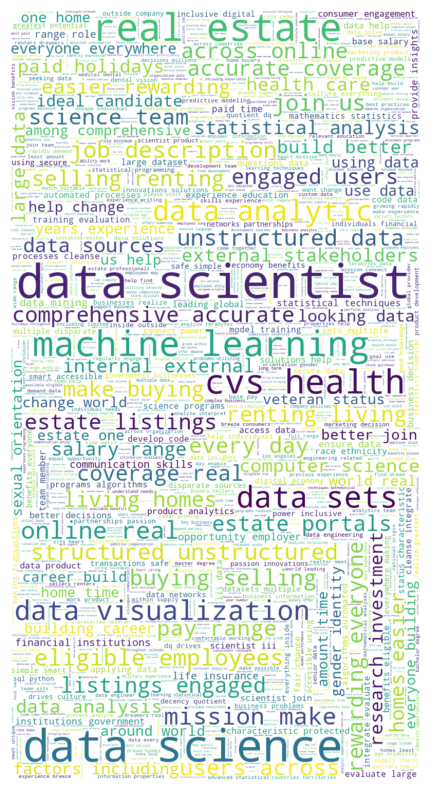

In [81]:
words = " ".join(eda_df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

## Notes To work on from the DataClean&Preprocess Notebook

### 1. Job Title column 
    a. decision scientist bug
    b. the seniority column has alot of missing values , maybe figure out how to deal with this later or drop it 🛠
### 3.Job Description Column 
    b. maybe we try to preprocess the descriptions, try to get new insights 🛠
### 4. Rating Column
    a. Deal with missing Rating values(-1) 🛠
### 5. Company_location
    a.include the state name beside the abbreviation for readability
### 7. Company Size Column
    b. maybe change this column to categories 🛠
    c. what will we do with the remaining 13 missing values 🛠
### 8.Founded column => Age Column
    c. how are gonna deal with the remaining 18 missing values 🛠
    c. maybe we need to turn this column into categories of age 🛠
### 9. Type of ownership column
    c. deal with missing values and turn into categories🛠
### 10. Industry Column
    b. deal with the remaining 16 missing values🛠
### 11. Sector Column
    b. deal with the remaining 9 missing values🛠
### 12.Revenue Column
    a. there 375 missing values in the Revenus column🛠
    b. How r we gonna deal with that🛠